In [1]:
using Bloqade
using Distributions
using LegendrePolynomials
using PythonCall
using LinearAlgebra
using Printf

include("../src/BloqadeControl.jl")
using .BloqadeControl

In [5]:
# Specify parametrization of waveforms
n_sites = 2
basis = "legendre"
n_basis = 10
use_sigmoid_envolope = true
tf = 1.0
F0 = [(x)->0.,(x)->0.]

# Specify training parameters
params = 2. * rand(Float64, (2, n_basis)) .- 1.
lr = 5e-2
w_l2 = 1e-3
n_iter = 500
method = "adam"

# Specify parameters of Rydberg atoms
distance = 5.95
atoms = generate_sites(ChainLattice(), n_sites, scale=distance);
local_detuning = [-1, 1]
global_detuning = 0.0
n_samples = 20

# Specify initial & target state
zero_state = Array{ComplexF64}([1, 0, 0, 0])
bell_state = Array{ComplexF64}([1, 0, 0, 1]./sqrt(2))

init_states = [zero_state]
observables = []

#target_state = arrayreg(bit"11") ## all-one state
#target_state = uniform_state(n_sites) ## uniform superposition state
target_state = ArrayReg(bell_state; nlevel=2)
J = UniformScaling(1.)
tar_op = density_matrix(target_state).state
M = GeneralMatrixBlock(J - tar_op; nlevel=2);
append!(observables, [M])

1-element Vector{Any}:
 matblock(...)

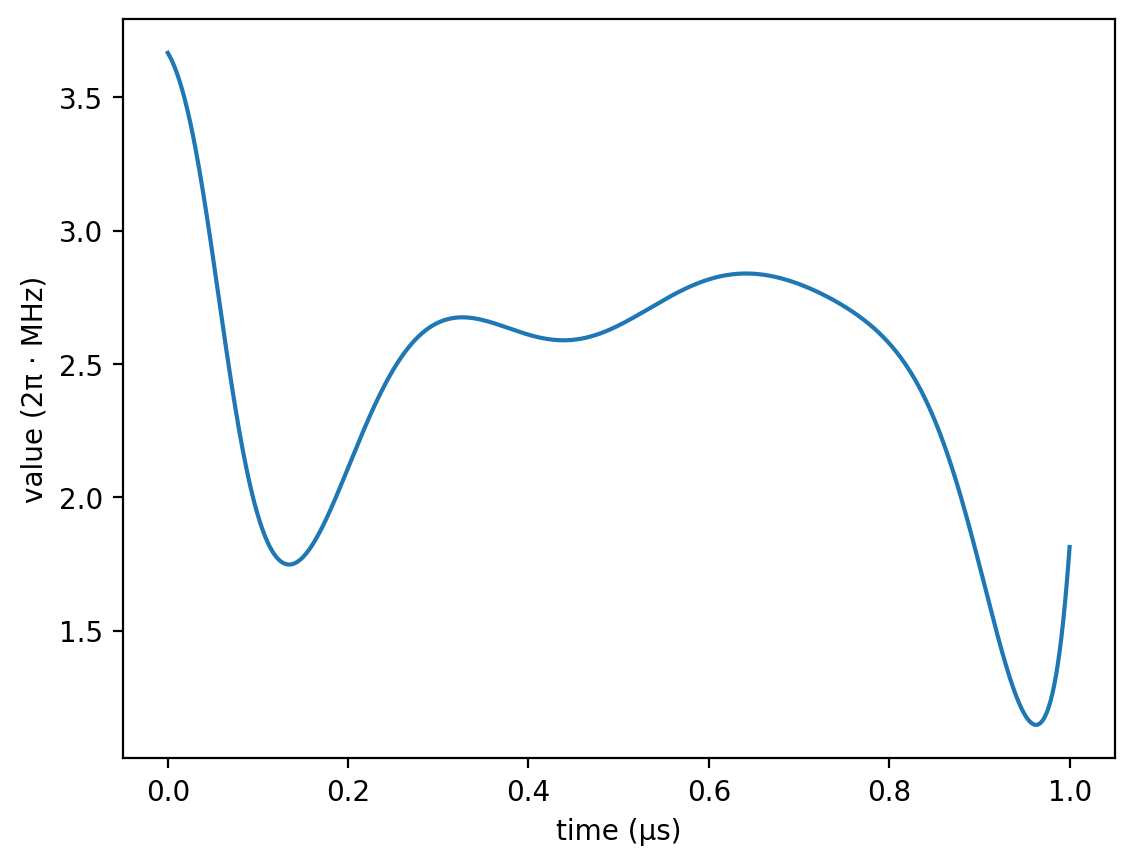

In [7]:
# Setup optimizer
generator = WaveformGenerator(n_sites, basis, n_basis, use_sigmoid_envolope, F0, tf)
model = BloqadeModel(atoms, local_detuning, global_detuning, n_samples, init_states, observables);
optim = Optimizer(params, lr, w_l2, n_iter, method)

# Plot waveforms
update_waveform!(model, generator, optim.params)
Bloqade.plot(generator.Ω1)
#Bloqade.plot(generator.Δ1[1])

In [8]:
# Start training
update_waveform!(model, generator, optim.params)
@printf "Current loss function value is %.3f.\n" compute_loss(model, generator, optim)

train_loss!(model, generator, optim)

Current loss function value is 0.617.
epoch: 10, loss = 0.5351, batch_loss = 0.5351
epoch: 20, loss = 0.5221, batch_loss = 0.5221
epoch: 30, loss = 0.5154, batch_loss = 0.5154
epoch: 40, loss = 0.5087, batch_loss = 0.5087
epoch: 50, loss = 0.5059, batch_loss = 0.5059
epoch: 60, loss = 0.5048, batch_loss = 0.5048
epoch: 70, loss = 0.5034, batch_loss = 0.5034
epoch: 80, loss = 0.5040, batch_loss = 0.5040
epoch: 90, loss = 0.5043, batch_loss = 0.5043
epoch: 100, loss = 0.5033, batch_loss = 0.5033
epoch: 110, loss = 0.4991, batch_loss = 0.4991
epoch: 120, loss = 0.4977, batch_loss = 0.4977
epoch: 130, loss = 0.4958, batch_loss = 0.4958
epoch: 140, loss = 0.4927, batch_loss = 0.4927
epoch: 150, loss = 0.4896, batch_loss = 0.4896
epoch: 160, loss = 0.4852, batch_loss = 0.4852
epoch: 170, loss = 0.4751, batch_loss = 0.4751
epoch: 180, loss = 0.4546, batch_loss = 0.4546
epoch: 190, loss = 0.4229, batch_loss = 0.4229
epoch: 200, loss = 0.3573, batch_loss = 0.3573
epoch: 210, loss = 0.2674, batc

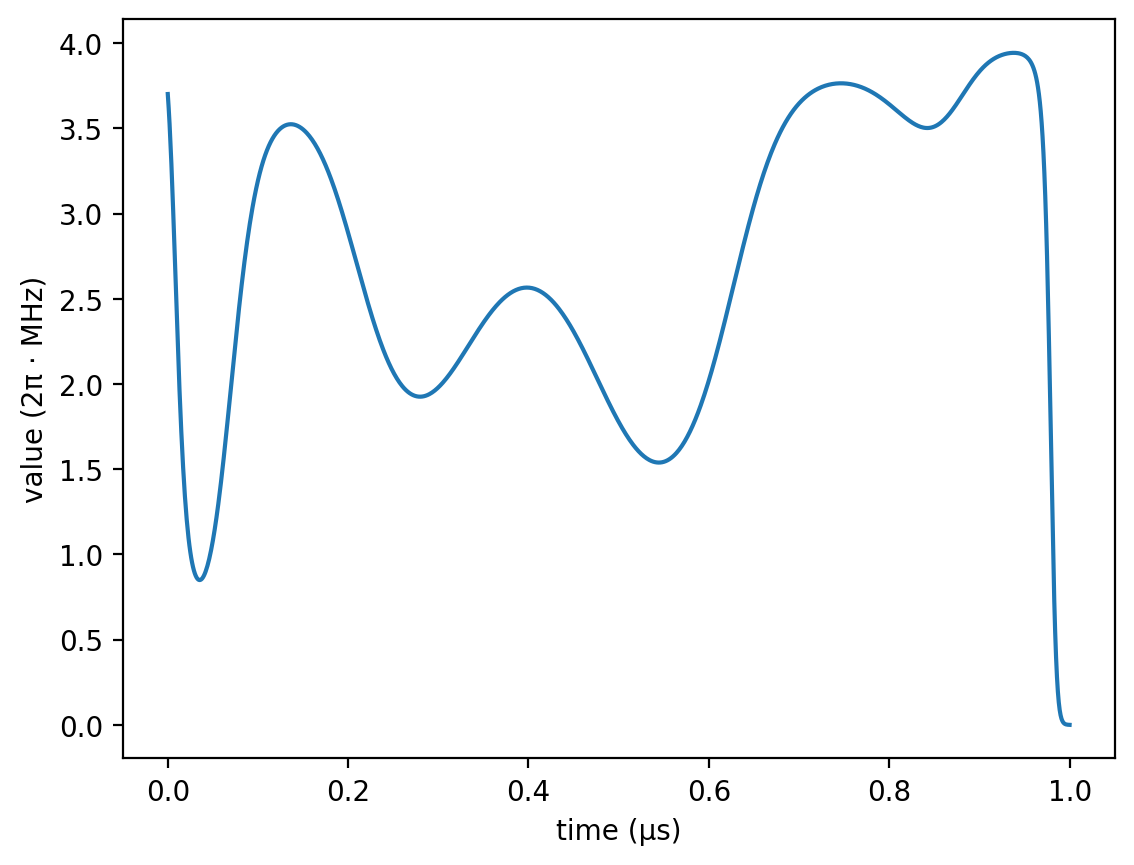

In [9]:
# Final pulse visualization
update_waveform!(model, generator, optim.params)
Bloqade.plot(generator.Ω1)

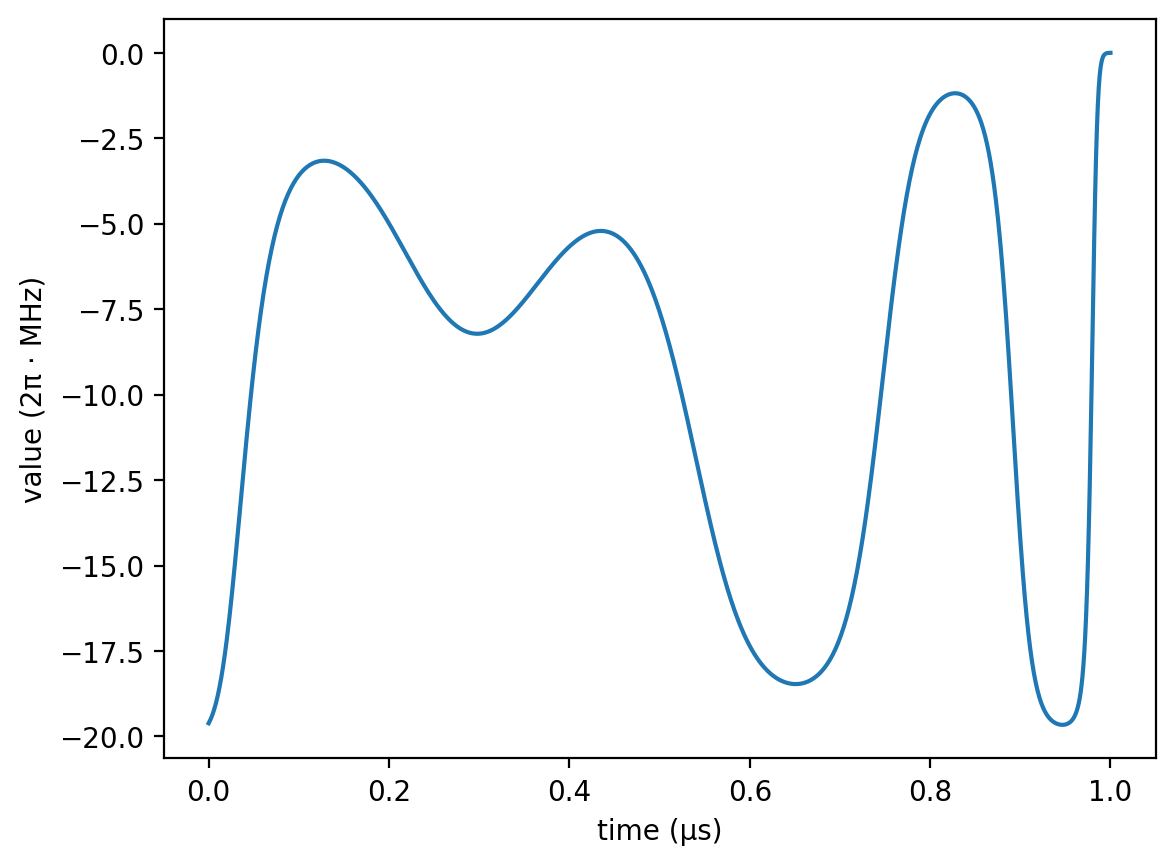

In [10]:
Bloqade.plot(generator.Δ1[1])